<a href="https://colab.research.google.com/github/salauddinkhan1986/Bagging-Boosting-Project/blob/main/Bagging_and_Boosting_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging and Boosting

**Libararies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading CSV file**

In [2]:
data = pd.read_csv('/content/talking_data.csv')
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [3]:
data.shape

(100000, 8)

In [4]:
data.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


**Explore the dataset for anomalies and missing values and take corrective actions if necessary.****

In [5]:
Missing_value = data.isna().sum()
Missing_value

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [6]:

data.drop(['attributed_time'],inplace=True,axis=1)

In [7]:
data.head()

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0


**2. Which column has maximum number of unique values present among all the available columns**


In [8]:
len(data.ip.unique())

34857

In [9]:
len(data.app.unique())

161

In [10]:
len(data.device.unique())

100

In [11]:
len(data.os.unique())

130

In [12]:
len(data.channel.unique())

161

In [13]:
len(data.click_time.unique())

80350

In [14]:
len(data.is_attributed.unique())

2

**Click time has maximum unique value**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


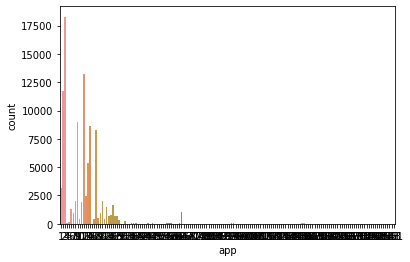

In [15]:
sns.countplot('app',data=data)
plt.show()

**4. By using Pandas derive new features such as - 'day_of_week' , 'day_of_year' , 'month' , and 'hour' as                  float/int datatypes using the 'click_time' column . Add the newly derived columns in original dataset.**


In [16]:
data['click_time']=pd.to_datetime(data['click_time'])


In [17]:
def timefunction(data):
  data['date']=pd.to_datetime(data['click_time'])
  data['day of week']=data['click_time'].dt.dayofweek
  data['day of year']=data['click_time'].dt.dayofyear
  data['month']=data['click_time'].dt.month
  data['hour']=data['click_time'].dt.hour
  return data



In [18]:
data = timefunction(data)
data.head()

,ip,app,device,os,channel,click_time,is_attributed,date,day of week,day of year,month,hour
0,87540,12,1,13,497,2017-11-07 09:30:38,0,2017-11-07 09:30:38,1,311,11,9
1,105560,25,1,17,259,2017-11-07 13:40:27,0,2017-11-07 13:40:27,1,311,11,13
2,101424,12,1,19,212,2017-11-07 18:05:24,0,2017-11-07 18:05:24,1,311,11,18
3,94584,13,1,13,477,2017-11-07 04:58:08,0,2017-11-07 04:58:08,1,311,11,4
4,68413,12,1,1,178,2017-11-09 09:00:09,0,2017-11-09 09:00:09,3,313,11,9


In [19]:
data.drop(['click_time'],inplace=True,axis=1)

In [20]:
data.drop(['date'],inplace=True,axis=1)

In [21]:
data.head()

,ip,app,device,os,channel,is_attributed,day of week,day of year,month,hour
0,87540,12,1,13,497,0,1,311,11,9
1,105560,25,1,17,259,0,1,311,11,13
2,101424,12,1,19,212,0,1,311,11,18
3,94584,13,1,13,477,0,1,311,11,4
4,68413,12,1,1,178,0,3,313,11,9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


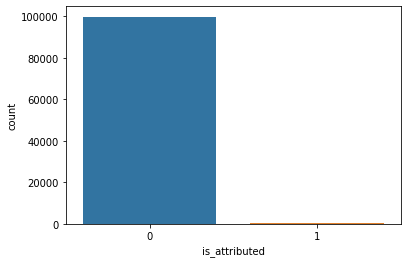

In [22]:
sns.countplot('is_attributed',data=data)
plt.show()

**5. Divide the data into training and testing subsets into 80:20 ratio(Train_data = 80% , Testing_data = 20%) and
     check the average download rates('is_attributed') for train and test data, scores should be comparable.**


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = data.drop(['is_attributed'],axis=1)
y = data['is_attributed']

In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_attributed, dtype: int64

In [26]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [27]:
x_train.shape

(80000, 9)

In [28]:
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80000,)
(20000, 9)
(20000,)


**6. Apply XGBoostClassifier with default parameters on training data and make first 10 prediction for Test data.          NOTE: Use y_pred = model.predict_proba(X_test) since we need probabilities to compute AUC.** 


In [29]:
import xgboost as XGB
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn import metrics

In [30]:
model = XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier()

In [31]:
y_ped = model.predict_proba(x_test)
y_ped[:10]

array([[9.9911392e-01, 8.8606233e-04],
       [9.9971098e-01, 2.8904207e-04],
       [9.9957001e-01, 4.2999475e-04],
       [9.9988139e-01, 1.1860472e-04],
       [9.9948424e-01, 5.1578088e-04],
       [9.9919510e-01, 8.0487703e-04],
       [9.9981821e-01, 1.8181987e-04],
       [9.9884534e-01, 1.1546672e-03],
       [9.9983871e-01, 1.6130014e-04],
       [9.9961501e-01, 3.8500421e-04]], dtype=float32)

**7. On evaluating the predictions made by the model what is the AUC/ROC score with default hyperparameters.**


In [32]:
ROC = metrics.roc_auc_score(y_test,y_ped[:,1])
print("AUC score  %.2f%% "% (ROC*100))

AUC score  94.87% 


In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy',class_weight={0:.5,1:.5},max_depth=5,min_samples_leaf=5)
rfc = rfc.fit(x_train,y_train)
test_model = rfc.predict(x_test)
rfc_score = rfc.score(x_test,y_test)
print('Random forest classifier accuracy is{}'.format(rfc_score))


Random forest classifier accuracy is0.99715


**9. Apply BaggingClassifier with base_estimator LogisticRegression and compute AUC/ROC score.


In [35]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=10,max_samples=.7,bootstrap=True)
bc = bc.fit(x_train,y_train)
test_model = bc.predict(x_test)
bc_score = rfc.score(x_test,y_test)
print('Bagging classifier accuracy is{}'.format(bc_score))


Bagging classifier accuracy is0.99715


**10.  On the basis of AUC/ROC score which one will you choose from BaggingClassifier and XGBoostClassifier and              why?What does AUC/ROC score signifies?


**BaggingClassifier has better accuracy than XGBoostClassifier therefore we will choose BaggingClassifier**